# Notebook to visualize TCAV results 

Loads TCAV results .pkl files, where concepts are defined. 

Use function to visualize and save histograms of TCAV score distribution and bar plots of overview of testing

### Followed by visual of sensitivity scores

In [6]:
import sys 
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sys.path.insert(0,'/zhome/94/5/127021/speciale/master_project')
from src.visualization.tcav_visual import plot_results, plot_results_mark

In [7]:
PATH = '/work3/s174498/nlp_tcav_results/'
target = 'negative'
results = '_gender_layer_dropout_0_11_probs'#'_gender_layer_droput_0_11'
with open(PATH + target+results + '.pkl','rb') as handle:
    data = pickle.load(handle)
    print('got that data')

got that data


/zhome/94/5/127021/speciale/master_project/src/visualization/figures/gender_concepts/probs/
concept gender
concept intersex
concept man
concept woman
num concepts 4


/zhome/94/5/127021/speciale/master_project/src/visualization/tcav_visual.py:202: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(results[target]['random'][bottleneck]['TCAV'], result[bottleneck]['TCAV'])


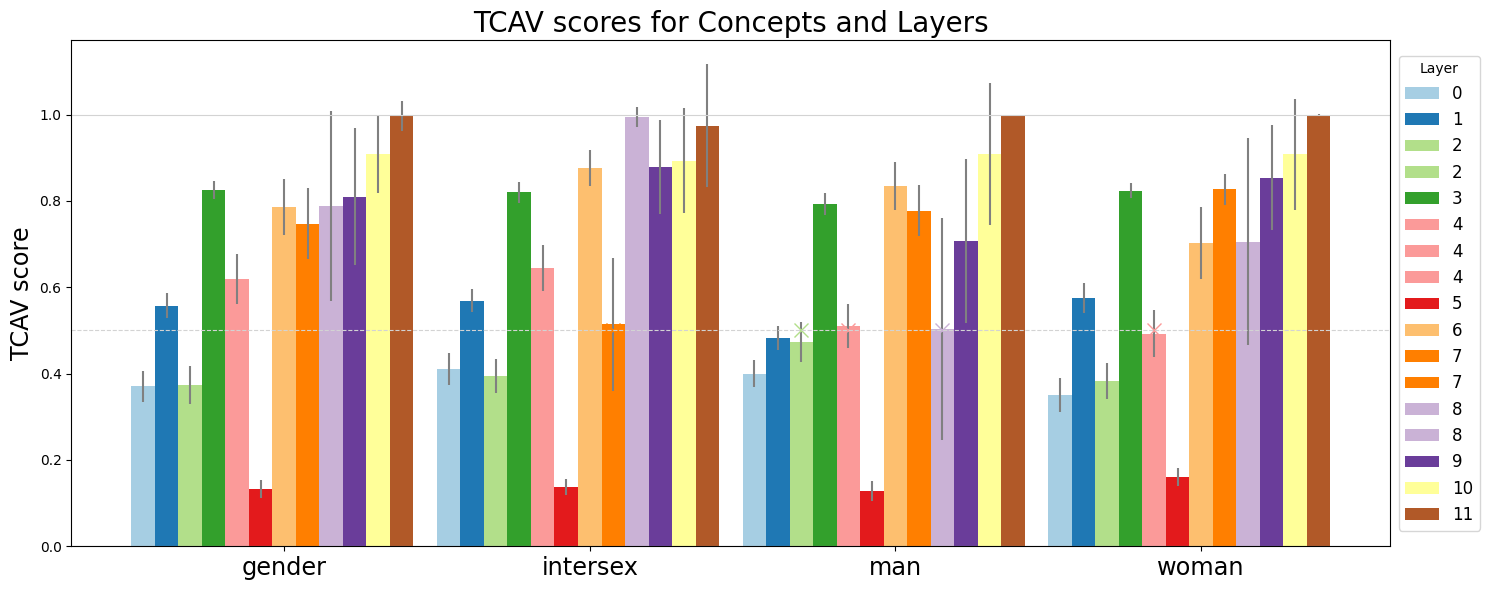

In [3]:
concepts =   ['gender','intersex','man','woman'] # ['woman']#  ['news','world','sport','business','science']#  ['hate','irony','offensive']#
PATH =  '/zhome/94/5/127021/speciale/master_project/src/visualization/figures/gender_concepts/probs/' #'/work3/s174498/nlp_tcav_results/figures/tweet_concepts/'
SAVE = False
BON_NR = 12*4
output = plot_results_mark(data, target, concepts ,PATH, plot_hist =False, save_fig = SAVE , t_test_mean = None, bonferroni_nr = BON_NR)

In [5]:
output['roberta.encoder.layer.11.output.dropout']

{'random_p-value': [0.5082066666666667, 0.4871717077627194],
 'bn_vals': [0.9976333333333334, 0.97396, 1.0, 0.99998],
 'bn_stds': [0.03515519560147232,
  0.142443932673721,
  0.0,
  0.000446766158073774],
 'significant': [True, True, True, True],
 'p-value': [3.002286487844991e-90,
  3.3081282570295987e-78,
  2.4830459671616357e-91,
  2.5177211858530814e-91],
 'concept': ['gender', 'intersex', 'man', 'woman']}

### Something with sensitivity 

In [20]:
PATH = '/work3/s174498/nlp_tcav_results/'

with open(PATH+'positive_gender_layer_dropout_0_11_probs.pkl','rb') as handle:
    data = pickle.load(handle)
random = data['positive']['random']
data = data['positive']['woman']


0.0003809571599641013
0.0022122066265985413


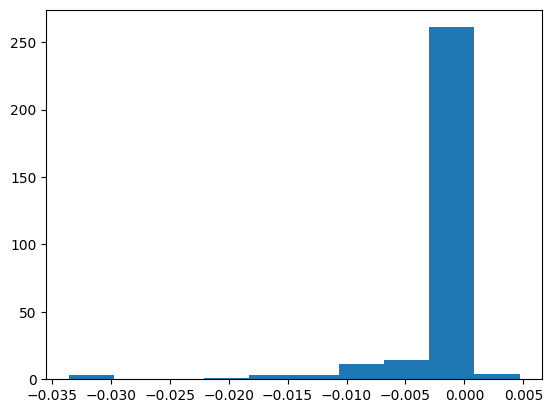

In [31]:
plt.hist(random['roberta.encoder.layer.1.output.dropout']['sensitivities'][0])
print(np.mean(random['roberta.encoder.layer.1.output.dropout']['sensitivities'][100]))
print(np.std(random['roberta.encoder.layer.1.output.dropout']['sensitivities'][100]))

In [82]:
df_random = pd.DataFrame(columns = ['Sensitivity','Bottleneck'])
for nr, bottleneck in enumerate(random): 
  df = pd.DataFrame(np.reshape(random[bottleneck]['sensitivities'],-1),columns=['Sensitivity'])
  df['Bottleneck'] = str(nr)
  df_random = pd.concat([df_random, df], ignore_index=True)

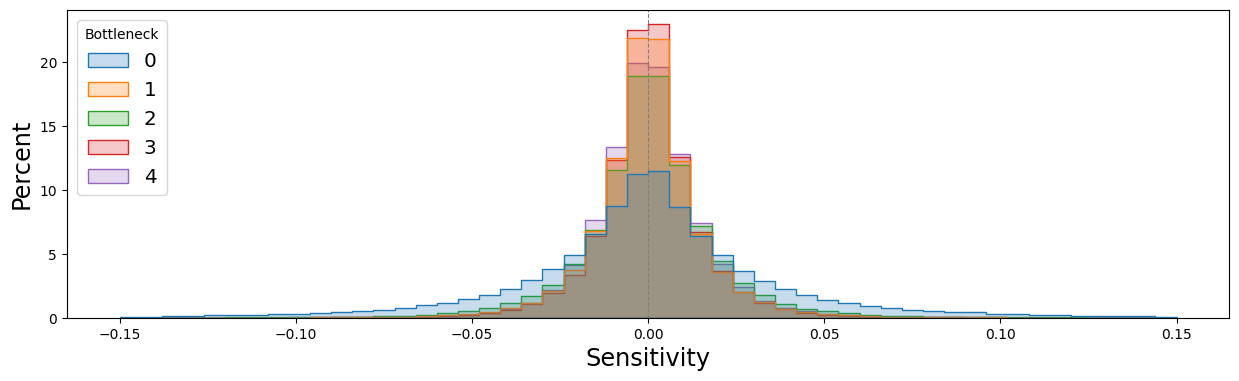

In [87]:
import seaborn as sns
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_random, x="Sensitivity", hue_order =['0','1','2','3','4'],
hue="Bottleneck", stat = 'percent', binrange = (-0.15,0.15),common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

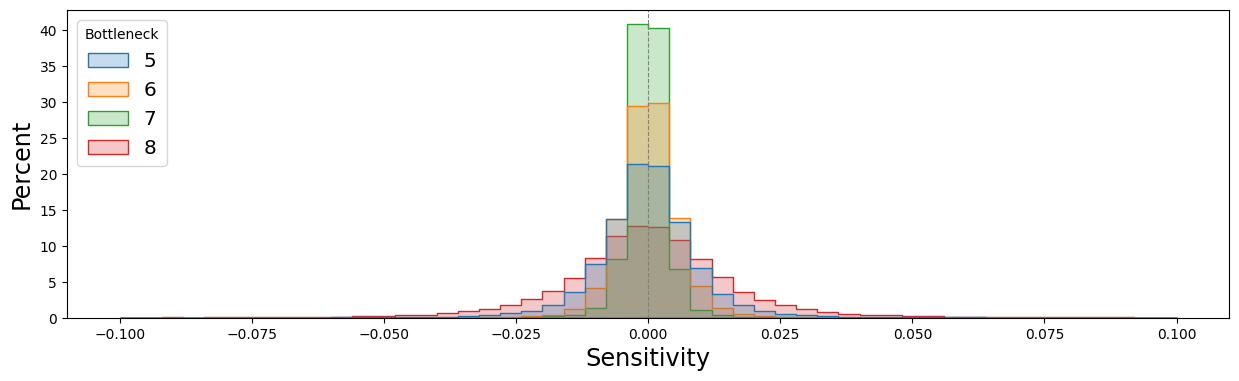

In [86]:
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_random, x="Sensitivity", hue_order =['5','6','7','8'],
hue="Bottleneck", stat = 'percent', binrange = (-0.1,0.1),common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

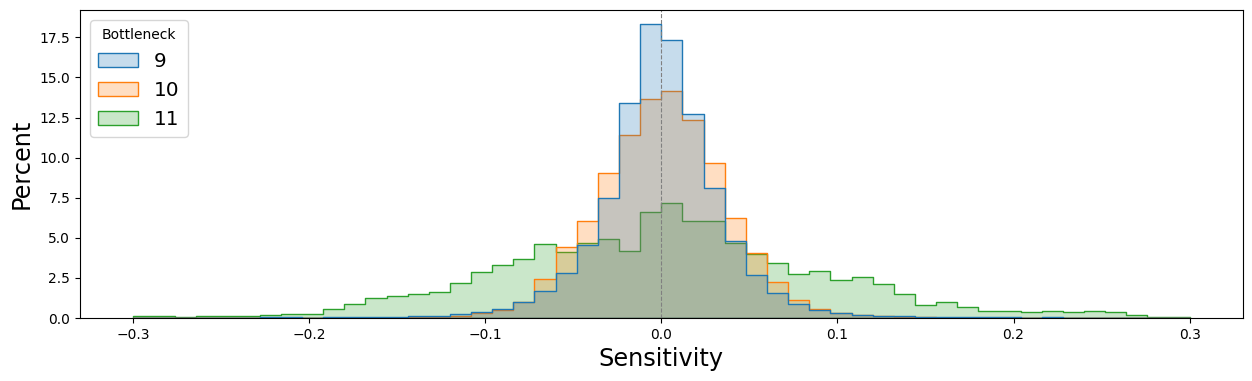

In [65]:
import seaborn as sns
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_random, x="Sensitivity", hue_order =['9','10','11'],
hue="Bottleneck", stat = 'percent', binrange = (-0.3,0.3),common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

## woman

In [91]:

df_woman = pd.DataFrame(columns = ['Sensitivity','Bottleneck'])
for nr, bottleneck in enumerate(random): 
  df = pd.DataFrame(np.reshape(data[bottleneck]['sensitivity'],-1),columns=['Sensitivity'])
  df['Bottleneck'] = str(nr)
  df_woman = pd.concat([df_woman, df], ignore_index=True)

(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)
(150000, 1)


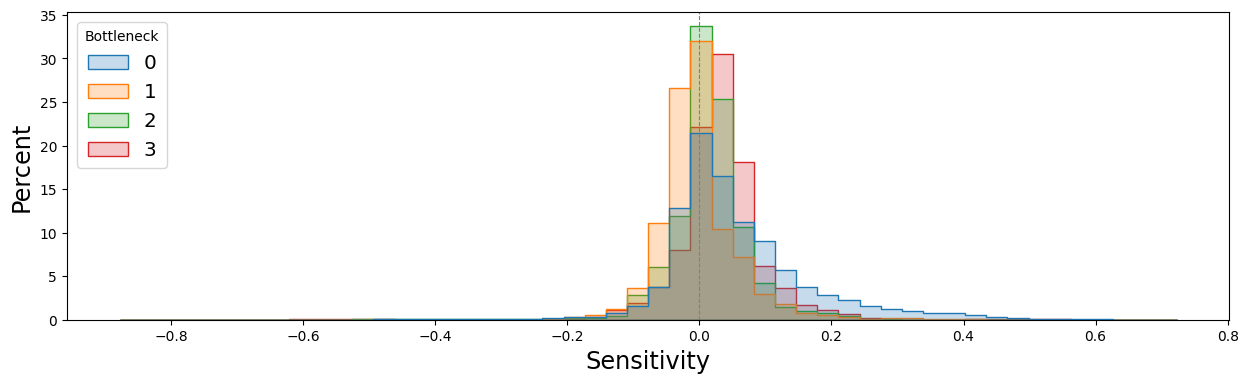

In [88]:

plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_woman, x="Sensitivity", hue_order =['0','1','2','3'],
hue="Bottleneck", stat = 'percent', common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

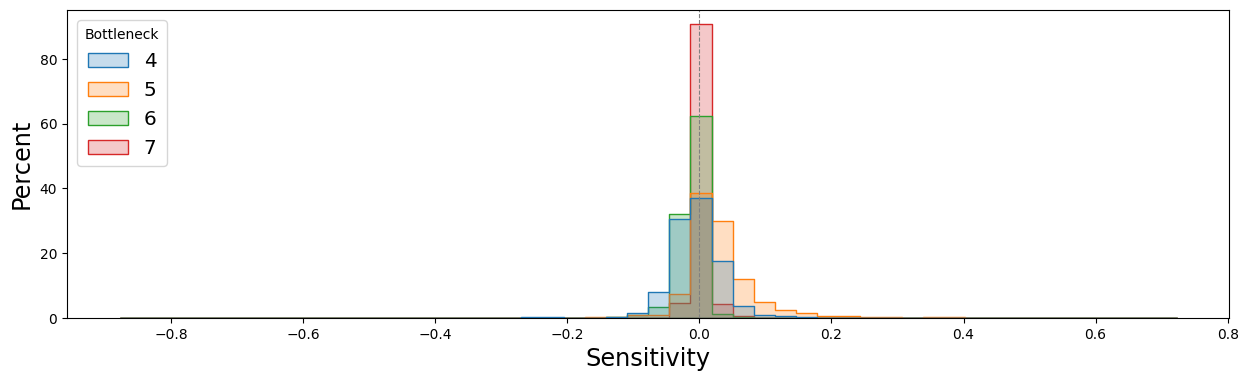

In [89]:
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_woman, x="Sensitivity", hue_order =['4','5','6','7'],
hue="Bottleneck", stat = 'percent', common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()

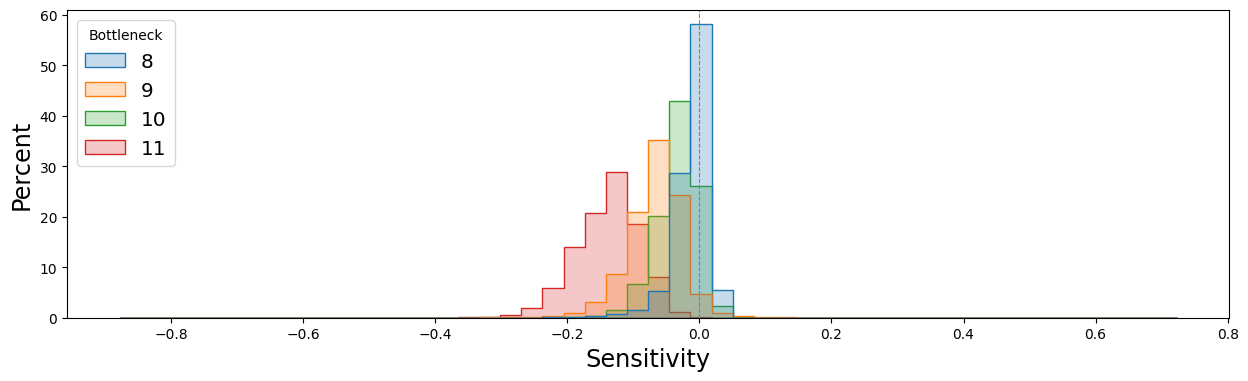

In [90]:
plt.figure(figsize=(15,4));

ax = sns.histplot(data=df_woman, x="Sensitivity", hue_order =['8','9','10','11'],
hue="Bottleneck", stat = 'percent',common_norm=False, bins = 50, element="step");#, palette=palette);

sns.move_legend( ax, loc = "upper left", fontsize = 'x-large');
ax.set_xlabel("Sensitivity",fontsize = 'xx-large');
ax.set_ylabel("Percent",fontsize =  'xx-large');
plt.axvline(0, 0,10, ls = '--', lw = 0.8, color = 'grey');
plt.show()